In [1]:
import tensorflow as tf

In diesem Beispiel sehen wir uns MNIST an.
Hierbei handelt es sich um eine Datenbank aus
70000 handgeschriebenen Ziffern, davon 60000 im Trainings-
und 10000 im Testdatensatz.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
batch_size = 50

x_train = x_train / 255.
x_test = x_test / 255.

Betrachten beispielhaft wir die erste Ziffer.

Text(0.5, 1.0, 'Value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

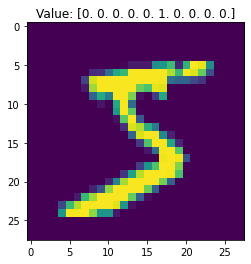

In [5]:
fst_image = x_train[0]
fst_digit = y_train[0]

import matplotlib.pyplot as plt
plt.imshow(fst_image)
plt.title(f"Value: {fst_digit}")

### Multilayer Perceptron
Nun erstellen wir die Architektur des neuronalen Netzes. Wir verwenden hier ein Fully Connected Neural Network mit einem Hidden Layer mit 64 Knoten.

<img src="assets/fcnn-28x28-64-10.svg"/>

In [6]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense

class MultiLayerPerceptron(Model):
    def __init__(self):
        super().__init__()
        self.flat = Flatten(input_shape=(28,28))
        self.fc1 = Dense(64, activation='relu')
        self.fc2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flat(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [7]:
lr_rate = 0.01
batch_size = 50

In [8]:
model = MultiLayerPerceptron()
model.build((batch_size, 28, 28))
model.summary()

Model: "multi_layer_perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  50240     
_________________________________________________________________
dense_1 (Dense)              multiple                  650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(x=x_train, y=y_train, epochs=3, validation_data=(x_test, y_test), batch_size=batch_size, verbose=2)

Epoch 1/3
1200/1200 - 4s - loss: 0.8074 - accuracy: 0.8000 - val_loss: 0.4168 - val_accuracy: 0.8881
Epoch 2/3
1200/1200 - 2s - loss: 0.3880 - accuracy: 0.8936 - val_loss: 0.3318 - val_accuracy: 0.9084
Epoch 3/3
1200/1200 - 2s - loss: 0.3299 - accuracy: 0.9070 - val_loss: 0.2959 - val_accuracy: 0.9172
